# Application of Analytics


# Problem Statement
1. Fitting a Decision Tree model on data. 
2. Training and Testing accuracy of your model. Split the data before modelling.

- Lastly, a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.

In [2]:
import pandas as pd

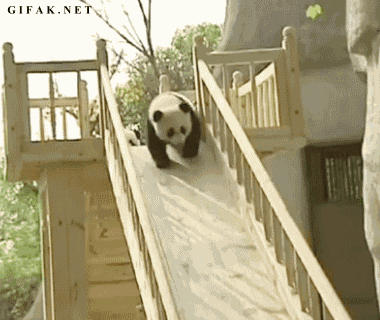

In [3]:
data=pd.read_csv("Placement_data.csv")

In [4]:
data

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

In [5]:
data.describe

<bound method NDFrame.describe of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Te

In [9]:
data.drop(['sl_no', 'ssc_b', 'hsc_b'], axis=1, inplace=True)

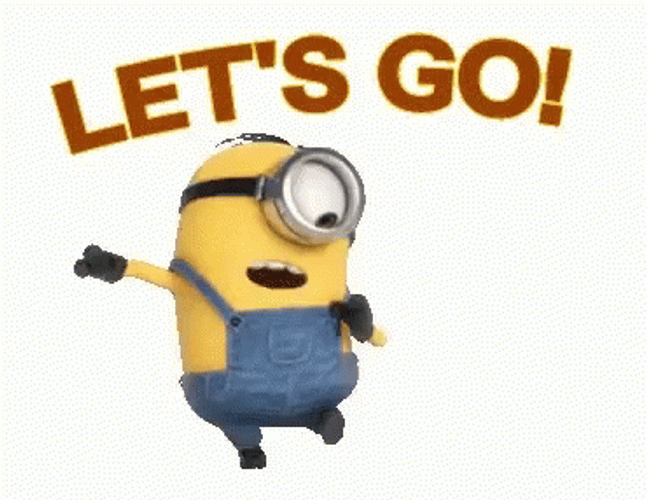

## Categories into numbers - Label Encoding

In [26]:
list_of_categorical_columns =  data.select_dtypes(include=['object']).columns

In [27]:
list_of_categorical_columns

Index(['gender', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status'], dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for i in list_of_categorical_columns:
    data[i]=le.fit_transform(data[i])

## Train and Test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x = data.drop(['status'], axis=1)
y = data['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

172
43
172
43


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [34]:
clf = DecisionTreeClassifier(min_samples_split=85)
clf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=85)

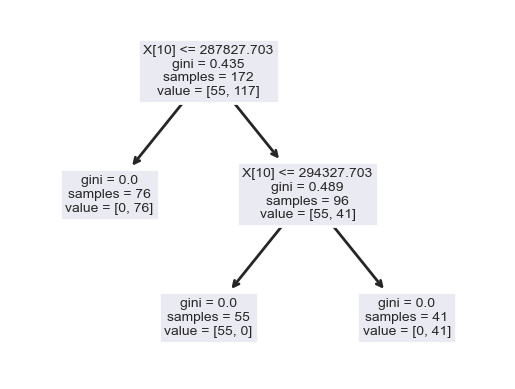

In [35]:
import matplotlib.pyplot as plt
tree.plot_tree(clf,fontsize=10)
plt.show()

## Training & Testing Accuracy

In [36]:
train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)

Training Accuracy: 1.0


In [37]:
y_pred = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_acc)

Testing Accuracy: 0.9767441860465116


## Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[12  0]
 [ 1 30]]


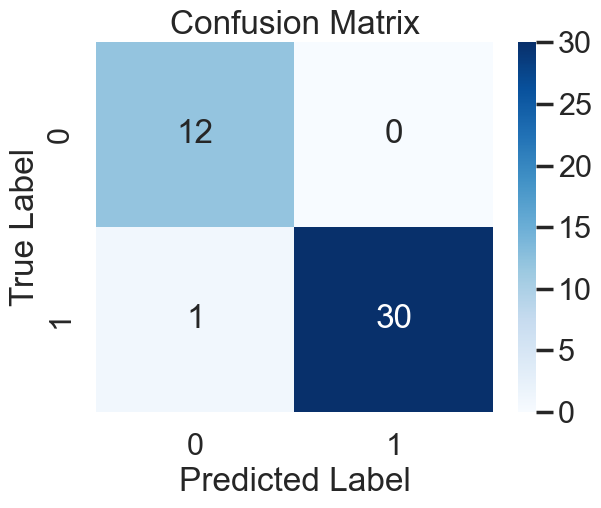

In [39]:
sns.heatmap(cm, annot=True,cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# New Function

In [47]:
from sklearn.preprocessing import LabelEncoder

def predict_placement_status(clf, gender, ssc_p, hsc_p, degree_p, etest_p, mba_p):
    
    # Create a dictionary with the input data
    input_dict = {'gender': [gender], 'ssc_p': [ssc_p], 'hsc_p': [hsc_p], 'degree_p': [degree_p],
                  'etest_p': [etest_p], 'mba_p': [mba_p], 'specialisation': [specialisation], 'workex': [workex]}
    
    # Create a DataFrame from the input dictionary
    input_df = pd.DataFrame.from_dict(input_dict)
    
    # Fit the label encoder on the 'gender' column in the input DataFrame
    label_encoder = LabelEncoder()
    label_encoder.fit(input_df['gender'])
    
    # Label encode the 'gender' column
    input_df['gender'] = label_encoder.transform(input_df['gender'])
    
    # Make a prediction using the input DataFrame
    placement_status = clf.predict(input_df)
    
    return placement_status[0]

## It's not happening

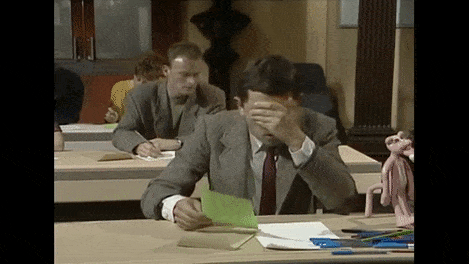